<a href="https://colab.research.google.com/github/nickprock/corso_data_science/blob/master/machine_learning_pills/02_unsupervised/06_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dimensionality Reduction

Le tecniche per la riduzione della dimensionalità sono molto utili quando abbiamo molte featurese il modello non riesce atrovare pattern nei dati per questo motivo.

Ne esistono diverse ma in questo notebook vedremo la più utilizzata, la Principal Component Analysis (PCA).

Funziona quando ci sono relazioni lineari tra le variabili, quindi in presenza di variabili numeriche continue. **L'obiettivo è quello di ridurre ma con la minima perdita di informazione.**

L'algoritmo per la riduzione della dimensionalità con PCA è più o meno il seguente:

1. Standardizzare il dataset *d-dimensionale*
2. Costruire la matrice di covarianza
3. Decomporre la matrice di covarianza nei suoi **autovalori** e **autovettori**
4. Ordinare gli autovalori riducendone l'ordine per valutare i corrispondenti autovettori
5. Selezionare *k* autovettori, che corrispondono ai *k* più grandi autovalori, dove *k* è la nuova dimensionalità del sottospazio delle caratteristiche, con $k \leq d$
6. Costruire la matrice di proiezione *W* dai primi *k* autovettori
7. Trasformare il dataset di input per ottenere il nuovo spazio delle caratteristiche.

<br>

![pca](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FG7Gkv.png&f=1&nofb=1)

<br>

[Image Credits](https://stats.stackexchange.com/questions/320743/why-are-eigenvectors-the-principal-components-in-principal-component-analysis)

<br>

Un esempio molto semplice per spiegare la PCA è quello dei pesci. Abbiamo dei pesci e possono essere misurati per:
* lunghezza
* altezza
* peso

Queste tre dimensioni sono correlate tra loro, quindi possono essere riassunte in un'unica nuova dimensione:
* stazza

### Dataset

Per questo esempio utilizzeremo nuovamente il dataset Iris già visto nel notebook sui decision tree.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Riproduciamo l'esperimento con il decision tree ma con tutte le variabili.

Il dataset è semplice e l'accuratezza sarà pari ad 1.

Lo scopo di questo mnotebook non è un miglioramento ma mostrare la poca perdita di informazione utilizzando la PCA.

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)

import time

start_time = time.time()
yhat = clf.predict(test_x)

print("execution time: ", time.time() - start_time)
print("\n")
print("accuracy: ", accuracy_score(test_y, yhat))

execution time:  0.0004107952117919922


accuracy:  1.0


### PCA: scegliere il numero di componenti a priori

In questo caso l'iperparametro da impostare è il numero stesso delle componenti.

Vogliamo due dimensioni, vedremo come sono fatte le componenti.

Notare che sul train applichiamo *fit_transform* mentre sul test solo *transform* questo vale per tutte le trasformazioni. Tra train e test ci potrebbe essere una scala di valori diversa che indurrebbe in errore lo stimatore.

In [ ]:
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

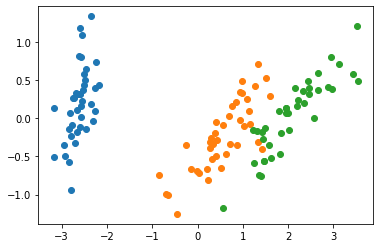

In [ ]:
import matplotlib.pyplot as plt

for i in np.unique(train_y):
  mask = train_y == i
  plt.scatter(train_x_pca[mask, 0], train_x_pca[mask, 1], label=i)

In [ ]:
clf.fit(train_x_pca, train_y)

import time

start_time = time.time()
yhat_pca = clf.predict(test_x_pca)

print("execution time: ", time.time() - start_time)
print("\n")
print("accuracy: ", accuracy_score(test_y, yhat_pca))

execution time:  0.0003371238708496094


accuracy:  0.9666666666666667


### PCA: scegliere la varianza spiegata

Un altro iperparametro che è possibile scegliere è quanta dell'informazione nel dataset originale vogliamo mantenere.

Solitamente deve essere almeno maggiore al 75% per non icorrere in errori grandi. Meglio se dal 90% in su, in questo caso una sola componente spiegherebbe quasi il 90% della variabilità quindi per averne tre usiamo il 99% come livello.

Quando si usa la varianza spiegata *svd_solver* che effettua la [**Singol Value Decomposition**](https://it.wikipedia.org/wiki/Decomposizione_ai_valori_singolari) deve essere impostato a "*full*".

In [ ]:
pca = PCA(n_components=0.99, svd_solver="full")
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

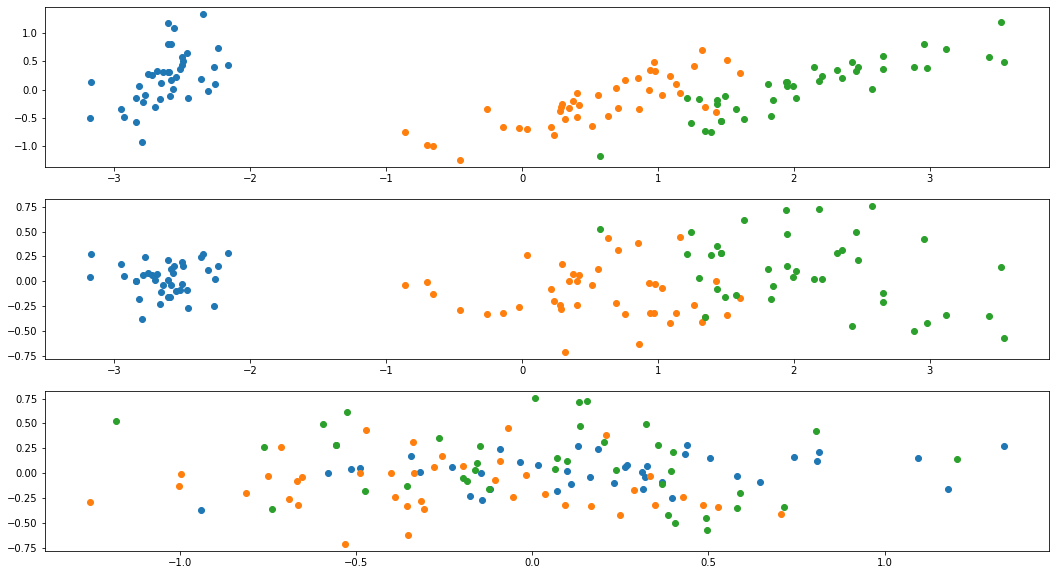

In [ ]:
plt.figure(figsize=(18,10))
for i in np.unique(train_y):
  mask = train_y == i
  plt.subplot(3,1,1)
  plt.scatter(train_x_pca[mask,0], train_x_pca[mask,1], label = i)
  plt.subplot(3,1,2)  
  plt.scatter(train_x_pca[mask,0], train_x_pca[mask,2], label = i)
  plt.subplot(3,1,3)
  plt.scatter(train_x_pca[mask,1], train_x_pca[mask,2], label = i)
plt.show()

In [ ]:
clf.fit(train_x_pca, train_y)

import time

start_time = time.time()
yhat_pca = clf.predict(test_x_pca)

print("execution time: ", time.time() - start_time)
print("\n")
print("accuracy: ", accuracy_score(test_y, yhat_pca))

execution time:  0.0003066062927246094


accuracy:  1.0


### Esercizio

<br>

![wine](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fdataaspirant.com%2Fwp-content%2Fuploads%2F2017%2F01%2Fwine-dataset.jpg&f=1&nofb=1)

<br>

[Image Credits](https://dataaspirant.com/2017/01/09/knn-implementation-r-using-caret-package/)

<br>

1. Creare un notebook utilizzando il dataset [Wine](http://archive.ics.uci.edu/ml/datasets/wine) e costruire un classificatore con e senza l'utilizzo della PCA.

2. Valutare i risultati della classificazione

3. Trovare il numero di componenti/livello di varianza spiegata ottimale

4. Scatterplot del risultato

**N.B. La classe [1, 2, 3] sta nella prima colonna del file.**